In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
import warnings
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score, accuracy_score, precision_score, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score




In [2]:
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [3]:
# Data wrangling
# first get rid of rows with duplicated data
data.duplicated().sum()
data.loc[data.duplicated(keep=False), :]

# rename some columns in a more understanable way
data = data.rename(columns={"CALC":"alcohol_drinking_frequency",
            "FAVC":"high_calorie_food_eat",
            "FCVC":"vegetable_eat_daily",
            "NCP":"number_of_meals_daily",
            "SCC":"calories_monitoring",
            "CH2O":"water_drinking_daily",
            "FAF":"physical_activity_daily",
            "TUE":"electronics_usage_daily",
            "CAEC":"food_between_meals",
            "MTRANS":"method_of_transportion"})

# convert some columns to integers and round them.
for col in ['Age', 'Weight', 'vegetable_eat_daily','number_of_meals_daily', 'water_drinking_daily','physical_activity_daily','electronics_usage_daily']:
    data[col] = data.loc[:,col].round().astype(int)

# describe mean/standard deviation/quartiles of data
data.describe()

,Age,Height,Weight,vegetable_eat_daily,number_of_meals_daily,water_drinking_daily,physical_activity_daily,electronics_usage_daily
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701677,86.586452,2.423496,2.687826,2.014685,1.006632,0.664614
std,6.357078,0.093305,26.190136,0.583905,0.809680,0.688616,0.895462,0.674009
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.500000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,23.000000,1.700499,83.000000,2.000000,3.000000,2.000000,1.000000,1.000000
75%,26.000000,1.768464,107.000000,3.000000,3.000000,2.000000,2.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# Statistical Model(s)

## Random Forest Regressor

For this random forest statistical model, the target variable is weight. While I admit, that it is not supposed to be the target variable, I decided to check how the random forest model would owrk with a continuous variable, rather than a categorical one.

First I set up the model. Encode all categorical variables. Yes, I admit that label encoder should be mainly used for target categorical variables. But I don't have one, and it still makes the statistical model function well with so many categorical features.
Then split it into target variable and features, afterwards split each of them into training and testing sets. The code fits the model, makes predictions, and calculates R-squared. Chose it, because it's used for calculating the effectiveness of models with a continuous target variable. Print this KPI value. Next comes feature importance. It is shown first as a DataFrame, then as a logarithmic bar chart.

In [5]:
df = pd.DataFrame(data)

# encodes categorial variables, so that they would help, instead of hindering, the random forest classification
label_encoder = LabelEncoder()
# later on, I intend to separate the dataframe into two, depending on gender
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['alcohol_drinking_frequency'] = label_encoder.fit_transform(df['alcohol_drinking_frequency'])
df['high_calorie_food_eat'] = label_encoder.fit_transform(df['high_calorie_food_eat'])
df['food_between_meals'] = label_encoder.fit_transform(df['food_between_meals'])
df['calories_monitoring'] = label_encoder.fit_transform(df['calories_monitoring'])
df['SMOKE'] = label_encoder.fit_transform(df['SMOKE'])
df['family_history_with_overweight'] = label_encoder.fit_transform(df['family_history_with_overweight'])
df['method_of_transportion'] = label_encoder.fit_transform(df['method_of_transportion'])
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

# Split the DataFrame into features and target
X = df.drop('Weight', axis=1)
y = df['Weight']

# split into training sets and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



As shown on the graph below, obesity type(NObeyesdad) is the feature that matters the most, with feature importance at 0.84. This is fairly obvious.

Next come height, age, and gender, in that order.

This logarithmic bar chart may not be too insightful, but it is an example of Random Forest Classifier used to predict a continuous variable based on a variety of continous and discrete values

R^2 Score: 0.98764766549528
                           Feature  Importance
15                      NObeyesdad    0.849482
2                           Height    0.100706
0                              Age    0.034673
1                           Gender    0.003854
9             water_drinking_daily    0.003327
14          method_of_transportion    0.001518
11         physical_activity_daily    0.001252
12         electronics_usage_daily    0.001227
3       alcohol_drinking_frequency    0.000974
6            number_of_meals_daily    0.000905
5              vegetable_eat_daily    0.000846
13              food_between_meals    0.000433
10  family_history_with_overweight    0.000344
4            high_calorie_food_eat    0.000281
7              calories_monitoring    0.000110
8                            SMOKE    0.000068


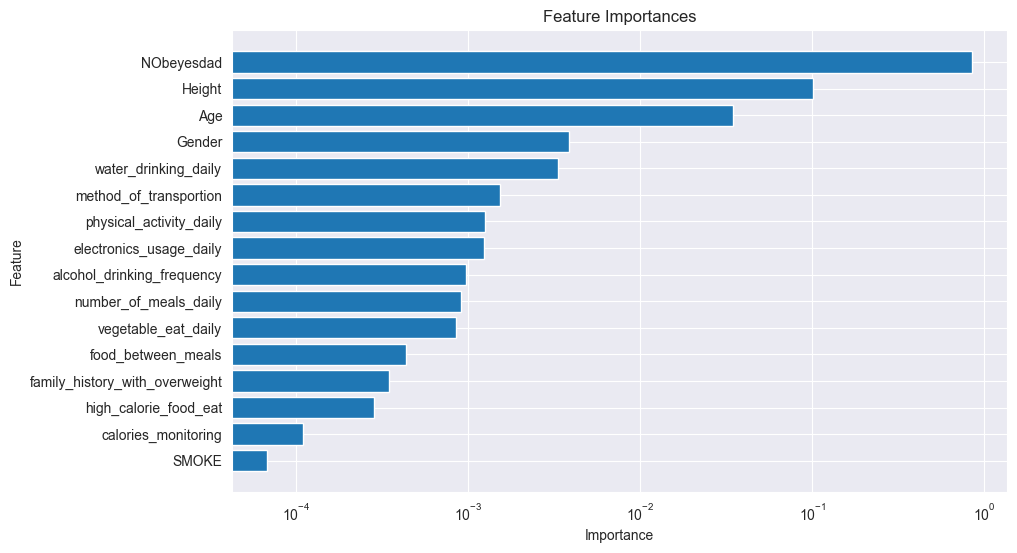

In [6]:
# Initialize the Random Forest model
model_1 = RandomForestRegressor(random_state=42)

# Train the model on the features and the target(weight)
model_1.fit(X_train, y_train)

# Make predictions about the weight based on existing features
y_pred = model_1.predict(X_test)

# Evaluate the model's effectiveness
score = r2_score(y_test, y_pred)
print(f'R^2 Score: {score}')


# get importance of features for weight
importances = model_1.feature_importances_
# get names of features
feature_names = X.columns
# make a dataframe with feature importance values
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_importances)

# Plot feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
# the x-scale is logarithmic, so that it would be easier to see, which features matter more than others
plt.xscale("log")
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

## Random Forest Classifier

This time, I decided to do same as above, but with a slightly different approach. 

Instead of focusing on the weight itself, the target variable is the obesity type, as it should be. 

First I set up the model. Split it into target variable and features, then split each of them into training and testing sets. Same as before. Then the code fits the model and makes predictions. Afterwards, calculate recall, accuracy and precision of the model. Print them. Next comes feature importance. It is shown as a logarithmic bar chart, same as above. Its shape is very similar, but there are a few differences. Since the target variable is obesity type, rather than weight, this means the less-important variables have their importance in 10e-2, rather than 10e-3. This is probably good, as it means other variables, besides age, height and gender have more meaning. This maybe even implies that "obesity type" makes for a better target variable than weight. But I am not sure how to justify it properly.

In [10]:
from sklearn.metrics import recall_score, accuracy_score, precision_score

# Encode the target variable
label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])


# Define categorical, binary, and numerical columns
categorical_cols = ['Gender', 'food_between_meals', 'alcohol_drinking_frequency', 'method_of_transportion']
binary_cols = ['family_history_with_overweight', 'high_calorie_food_eat', 'SMOKE', 'calories_monitoring']
numerical_cols = ['Age', 'Height', 'Weight', 'vegetable_eat_daily', 'number_of_meals_daily', 'water_drinking_daily', 'physical_activity_daily', 'electronics_usage_daily']

# Define preprocessor with OneHotEncoder for categorical columns and StandardScaler for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('binary', 'passthrough', binary_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

# AUC score - needs to be added. Account for false negatives and false positives

# Define the model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=1000, random_state=42))
])

# Split the DataFrame into features and target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']


# Split data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Train the model
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)

recall = recall_score(y_test, predictions, average='weighted')  
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted', zero_division=1) 
# Calculate AUC
# For multi-class, the AUC is calculated using the one-vs-rest approach
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')


print(f"Model: {"Random Forest Classifier"}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f'AUC: {auc}')
print(f"Precision: {precision}")
print("-" * 50)

Model: Random Forest Classifier
Recall: 0.9432624113475178
Accuracy: 0.9432624113475178
AUC: 0.9958314465597409
Precision: 0.9439015758666968
--------------------------------------------------


                           Feature  Importance
15          method_of_transportion    0.849482
2                           Height    0.100706
0                              Age    0.034673
1                           Gender    0.003854
9                            SMOKE    0.003327
14              food_between_meals    0.001518
11  family_history_with_overweight    0.001252
12         physical_activity_daily    0.001227
3                           Weight    0.000974
6              vegetable_eat_daily    0.000905
5            high_calorie_food_eat    0.000846
13         electronics_usage_daily    0.000433
10            water_drinking_daily    0.000344
4       alcohol_drinking_frequency    0.000281
7            number_of_meals_daily    0.000110
8              calories_monitoring    0.000068


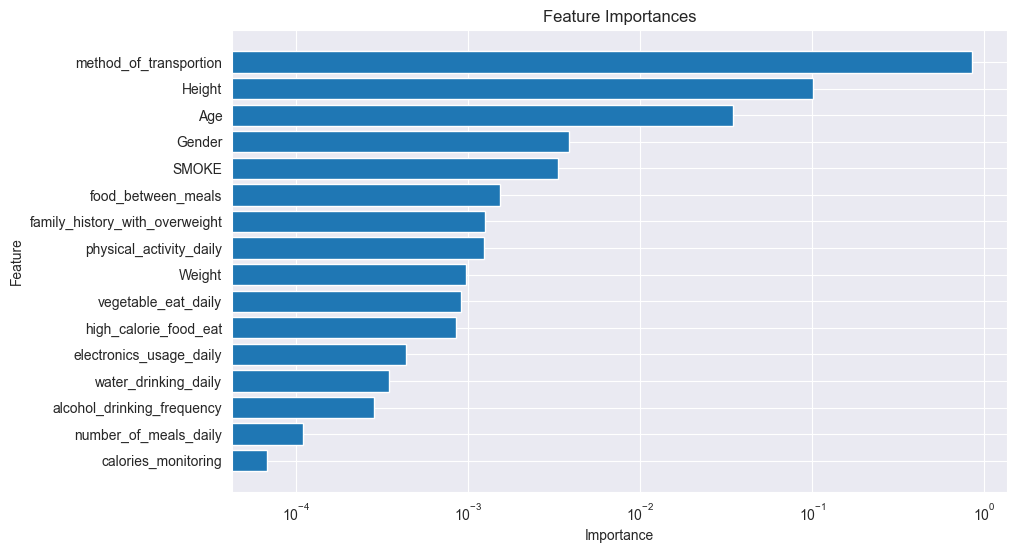

<Figure size 640x480 with 0 Axes>

In [14]:
# get names of features
feature_names = X.columns
# make a dataframe with feature importance values
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_importances)

# Plot feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
# the x-scale is logarithmic, so that it would be easier to see, which features matter more than others
plt.xscale("log")
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()
plt.savefig("feature_analysis.png")

This is the confusion matrix, the final part of the statistical model.

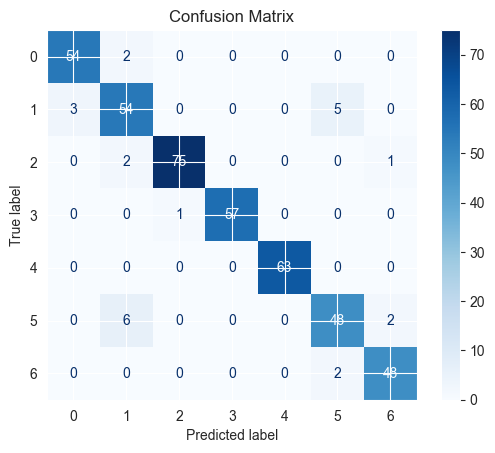

<Figure size 640x480 with 0 Axes>

In [15]:


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=label_encoder.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
